In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt
import specplotlib
import hubble_diagrams as hd

In [7]:
SN_df = pandas.read_csv('SNdf_with_MLCS31.csv')
s_umap = numpy.load('umap_frf.npy')
SN_df.head()

,idx,SN,zhel_spec,tmax(B)_spec,tmax(B)_err_spec,ref_spec,Dm15_spec,Dm15_err_spec,ref1_spec,M_B_spec,...,mu_err_salt,SNIa_ml31,z_ml31,z_err_ml31,Delta_ml31,Delta_err_ml31,A_V_ml31,A_V_err_ml31,mu_ml31,mu_err_ml31
0,0,1994D,0.0029,49432.5,0.1,"B,M,SA,SN",1.37,0.03,B,-99.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1994M,0.0232,49474.5,0.9,"B,M,SA,SN",1.26,0.06,B,-19.21,...,0.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1994S,0.0151,49518.3,0.3,"B,M,SA,SN",0.94,0.06,B,-19.55,...,0.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1994T,0.0346,49514.4,0.4,"M,SN",1.51,0.08,SN,-99.99,...,0.181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1994ae,0.0043,49685.5,0.8,"B,M,SA,SN",0.96,0.04,B,-99.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


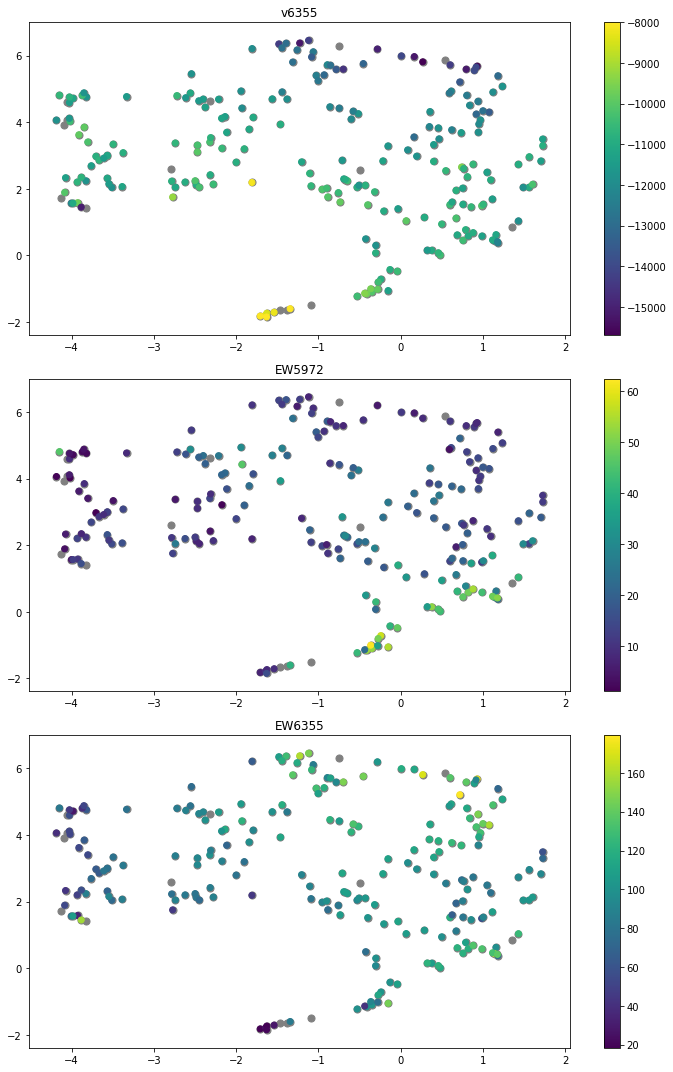

In [9]:
specplotlib.embedding_plot_spec_meas(s_umap, SN_df)

In [33]:
from importlib import reload
reload(hd)
reload(specplotlib)

<module 'specplotlib' from '/Users/itamar/git/astro/SNIa/specplotlib.py'>

In [30]:
m0, alpha, beta = hd.fit_nn('SALT', 8, SN_df, s_umap)

/Users/itamar/git/astro/SNIa/specplotlib.py:338: RuntimeWarning: invalid value encountered in less
  t[t < cut] = numpy.nan


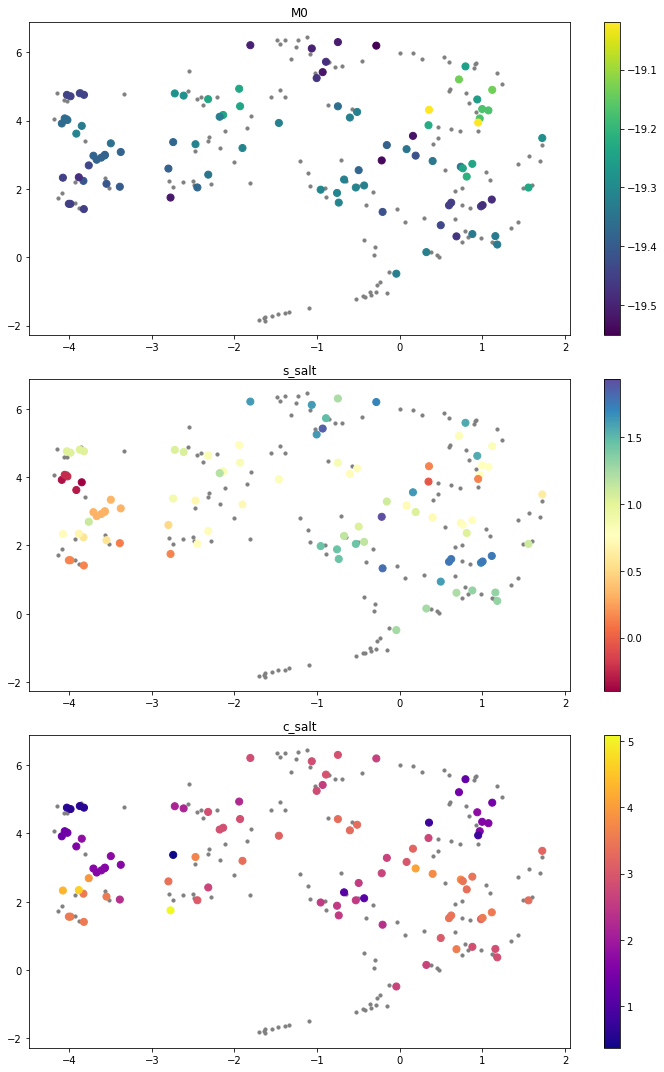

In [34]:
specplotlib.embedding_plot_fit_params(s_umap, m0, alpha, beta, fitter = 'fitter')

In [ ]:
reload(hd)

In [108]:
m0, alpha, beta = hd.fit_nn('SALT', 8, SN_df, s_umap)

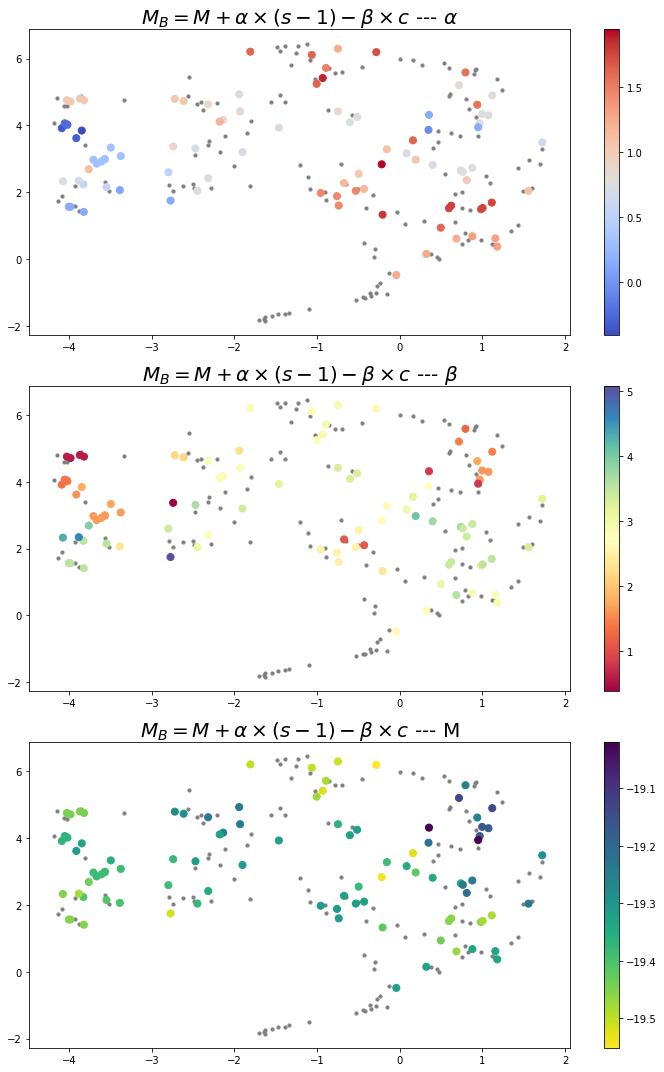

In [117]:
reload(specplotlib)
specplotlib.embedding_plot_fit_params(s_umap, m0, alpha, beta, fitter = 'SALT', s = 50)

In [149]:
reload(hd)

<module 'hubble_diagrams' from '/Users/itamar/git/astro/SNIa/hubble_diagrams.py'>

In [162]:
m0_mlcs, alpha_mlcs, beta_mlcs = hd.fit_nn('MLCS', 8, SN_df, s_umap)

In [88]:
z_distmod = hd.get_distance_modulos(SN_df)
has_fitter, X, dX, Y, dY = hd.get_xy_mlcs31(SN_df, z_distmod)

In [89]:
Yf = Y[has_fitter].copy()
Xf = X[has_fitter].copy()
dYf = dY[has_fitter].copy()
dXf = dX[has_fitter].copy()
res = hd.group_fit(numpy.arange(has_fitter.shape[0]), Xf, dXf, Yf, dYf, fitter = 'MLCS', flag_plot=False)
res

array([-19.41043971,  -0.7948911 ,  -1.26406271])

In [171]:
acut = 0
aplot = alpha_mlcs.copy()
aplot[aplot>acut] = acut

acut = -1.5
aplot[aplot<acut] = acut

#alpha_mlcs[abs(alpha_mlcs) > 5] = numpy.nan
#beta_mlcs[abs(beta_mlcs) > 5] = numpy.nan

bplot = beta_mlcs.copy()
bcut = 0
bplot[bplot>bcut] = bcut

bcut = -3.0
bplot[bplot<bcut] = bcut


/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


In [178]:
reload(specplotlib)

<module 'specplotlib' from '/Users/itamar/git/astro/SNIa/specplotlib.py'>

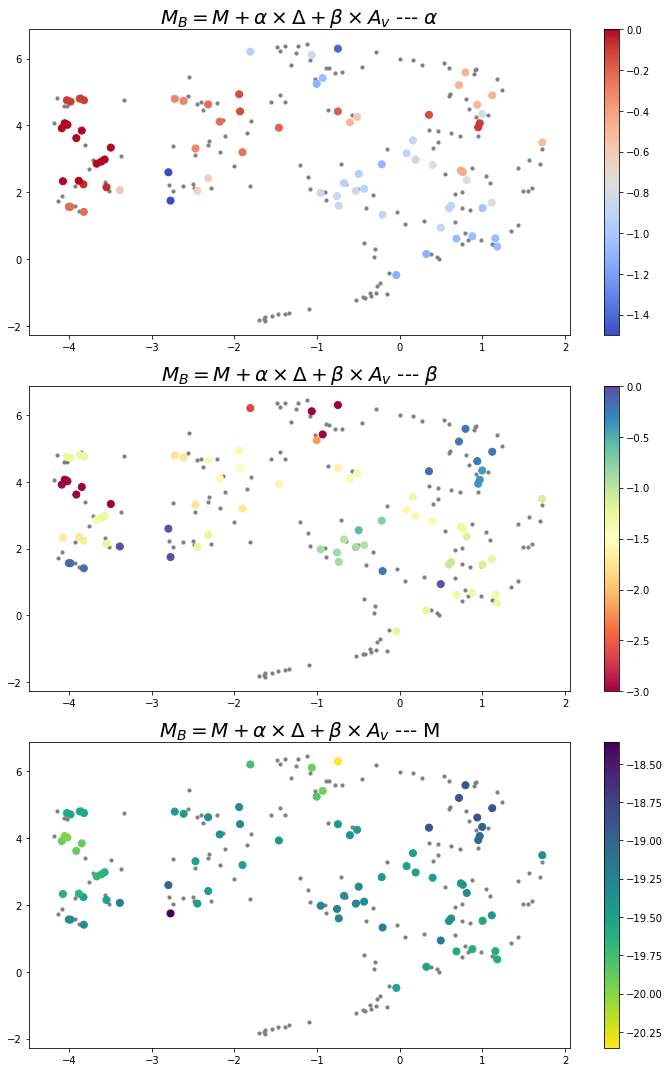

In [179]:
specplotlib.embedding_plot_fit_params(s_umap, m0_mlcs, aplot, bplot, fitter = 'MLCS')


In [170]:
alpha_mlcs[has_fitter]

array([-2.27854930e-01,  1.03178579e+00, -8.45942188e-01, -4.75018802e-01,
       -5.15827385e+00, -1.06584186e+00, -8.74292819e-01, -1.05738942e+00,
       -8.56160008e-01,  1.19341304e+00, -4.86627279e-01, -9.02717404e-01,
       -7.47837377e-01,  1.04498853e-01, -8.56160004e-01, -1.06584188e+00,
       -5.77221965e-02, -9.56568770e-02, -9.15183002e-01,  4.12940535e+03,
       -1.38310503e-01,  3.03166142e-01, -4.75018871e-01, -6.33640360e-01,
       -5.18428662e-01, -9.15183018e-01, -1.09035457e+00, -8.84055017e-01,
        8.25383627e-01, -1.94521173e-01, -6.33640246e-01, -9.47088774e-01,
       -8.81746457e-01, -5.70834449e-01, -9.56566503e-02, -2.27855020e-01,
       -8.74292873e-01, -9.02717270e-01, -9.17615345e-02, -8.56160020e-01,
        1.05304596e+00, -9.56569590e-02, -5.83582177e-01, -3.03229831e-01,
       -2.25164051e-01, -2.25164074e-01, -1.06584189e+00,  5.01871427e-01,
       -8.00110098e-01, -7.51951885e-01, -3.03196010e-01, -2.44561851e-01,
       -4.75018818e-01, -